In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [17]:
df = pd.read_csv('ph_dengue_cases2016-2020.csv')
df.head().style.background_gradient(cmap='flare')

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [18]:
df.tail().style.background_gradient(cmap='flare')

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1
1019,December,2020,BARMM,23,0


How have the number of cases of Dengue changed over the time period?

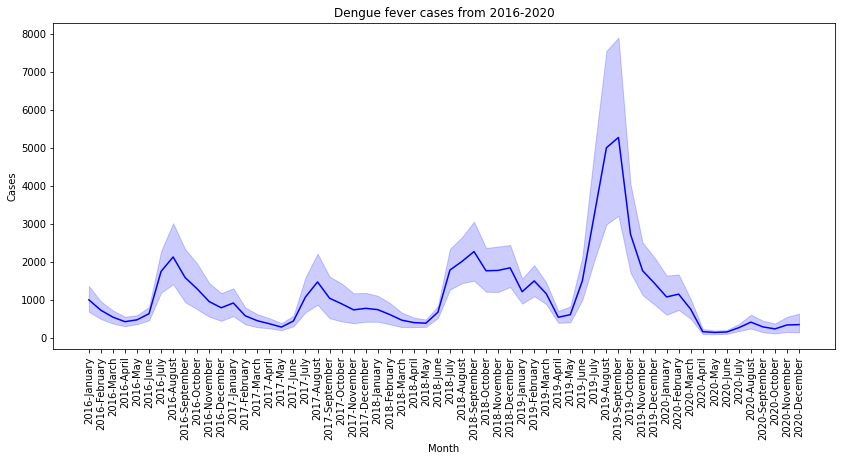

In [20]:
index = 0
monthYears = []
years = [i for i in df.Year]
for i in df.Month:
    monthYears.append(str(years[index])+'-'+str(i))
    index += 1
plt.figure(figsize=(14,6))
sns.lineplot(x=monthYears,y=[i for i in df['Dengue_Cases']],color='blue')
plt.title(label='Dengue fever cases from 2016-2020')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Cases')
plt.xticks(rotation=90)
plt.show()

 How do the number of cases differ for each region?

In [23]:
index = 0
dates = []
for i in df['Month']:
    dates.append(str([j for j in df['Year']][index])+'-'+i)
    index += 1
    
data = {'Date': dates,
        'Region': [i for i in df['Region']],
        'Dengue_Cases': [i for i in df['Dengue_Cases']],
        'Dengue_Deaths': [i for i in df['Dengue_Deaths']]}
cleanDF = pd.DataFrame(data)
cleanDF.head().style.background_gradient(cmap='flare')

,Date,Region,Dengue_Cases,Dengue_Deaths
0,2016-January,Region I,705,1
1,2016-February,Region I,374,0
2,2016-March,Region I,276,0
3,2016-April,Region I,240,2
4,2016-May,Region I,243,1


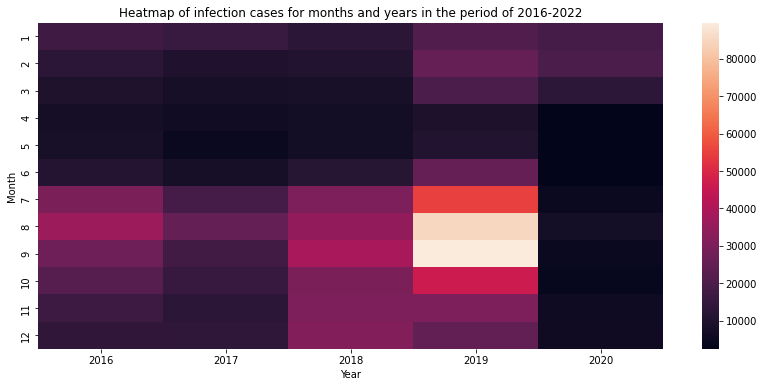

In [24]:
uniqueDates = []
for i in [j for j in cleanDF['Date']]:
    if i not in uniqueDates:
        uniqueDates.append(i)
totalCases = []
for i in uniqueDates:
    tempDF = cleanDF.query("Date == '{}'".format(i))
    totalCases.append([datetime.datetime.strptime(i.split('-')[1], '%B').month,
                       int(i.split('-')[0]),sum([i for i in tempDF['Dengue_Cases']])])
casesDF = pd.DataFrame(totalCases,columns=['Month','Year','Cases'])
plt.figure(figsize=(14,6))
sns.heatmap(casesDF.pivot("Month", "Year", "Cases"))
plt.title(label='Heatmap of infection cases for months and years in the period of 2016-2022')
plt.show()

In [25]:
regionCases = []
for i in np.unique(cleanDF['Region']):
    tempDF = cleanDF.query("Region == '{}'".format(i))
    regionCases.append([sum([i for i in tempDF['Dengue_Cases']]),i])
regionCases.sort()


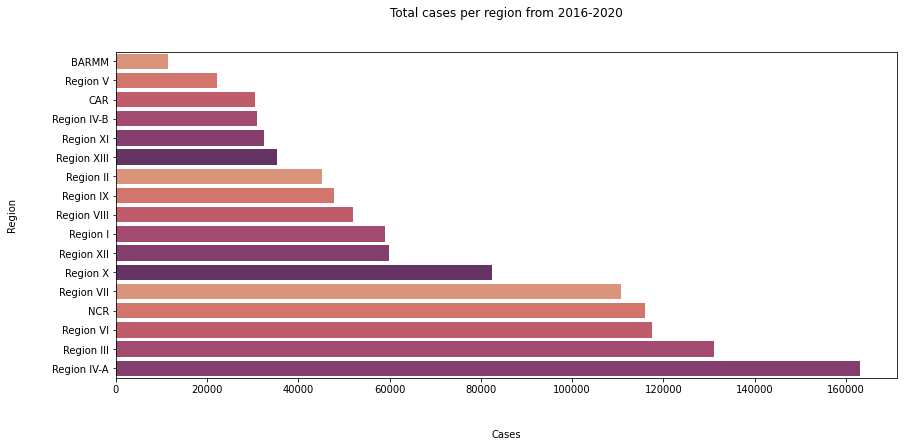

In [26]:
x = [i[0] for i in regionCases]
y = [i[1] for i in regionCases]

colors = sns.color_palette("flare")
plt.figure(figsize=(14,6))
sns.barplot(x=x,y=y,palette=colors)
plt.title(label='Total cases per region from 2016-2020',pad=35)
plt.xlabel(xlabel='Cases',labelpad=35)
plt.ylabel(ylabel='Region',labelpad=35)
plt.show()
